In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("../resources/Excel_sheets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis=1,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1=df[~pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

In [8]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

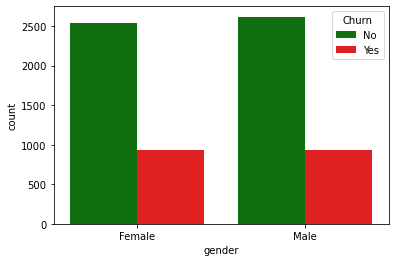

In [10]:
sns.countplot(x='gender',hue='Churn',palette=["green","red"],data=df1)

In [11]:
df1[df1.Churn=="Yes"].gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

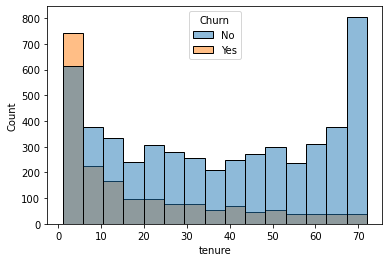

In [12]:
sns.histplot(data=df1,x='tenure',hue='Churn')

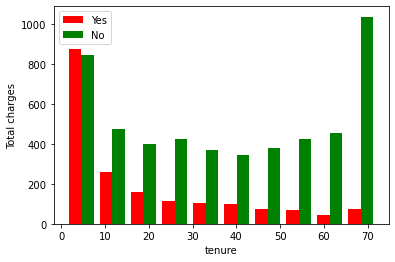

In [13]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Yes","No"])
plt.xlabel("tenure")
plt.ylabel("Total charges")
plt.legend()
plt.show()


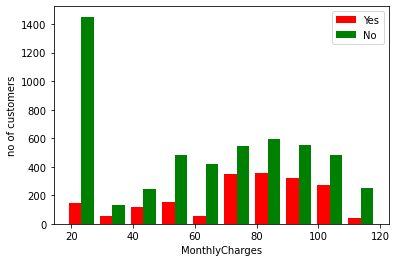

In [14]:
tenure_churn_no=df1[df1.Churn=="No"].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Yes","No"])
plt.xlabel("MonthlyCharges")
plt.ylabel("no of customers")
plt.legend()
plt.show()

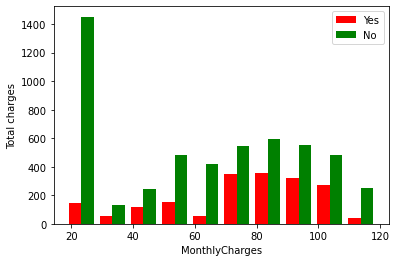

In [15]:
tenure_churn_no=df1[df1.Churn=="No"].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Yes","No"])
plt.xlabel("MonthlyCharges")
plt.ylabel("Total charges")
plt.legend()
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

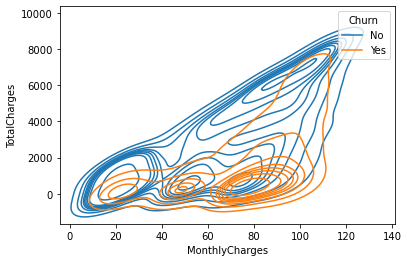

In [16]:
sns.kdeplot(data=df1,x='MonthlyCharges',y="TotalCharges",hue='Churn')

In [17]:
df1.TotalCharges.max()

8684.8

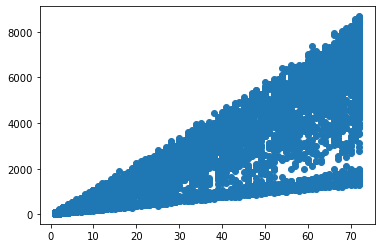

In [18]:
plt.scatter(df1.tenure,df1.TotalCharges)

In [19]:
d=df1.nunique()
rep={
   "Female":0,
    "Male":1,
    "Yes":1,
    "No":0,
    'No internet service':0,
    'No phone service':0
}

df2=df1.copy()
for col in d[d<4].index.values:
    df2[col].replace(rep,inplace=True)

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df2.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [21]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [22]:
df2.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:>

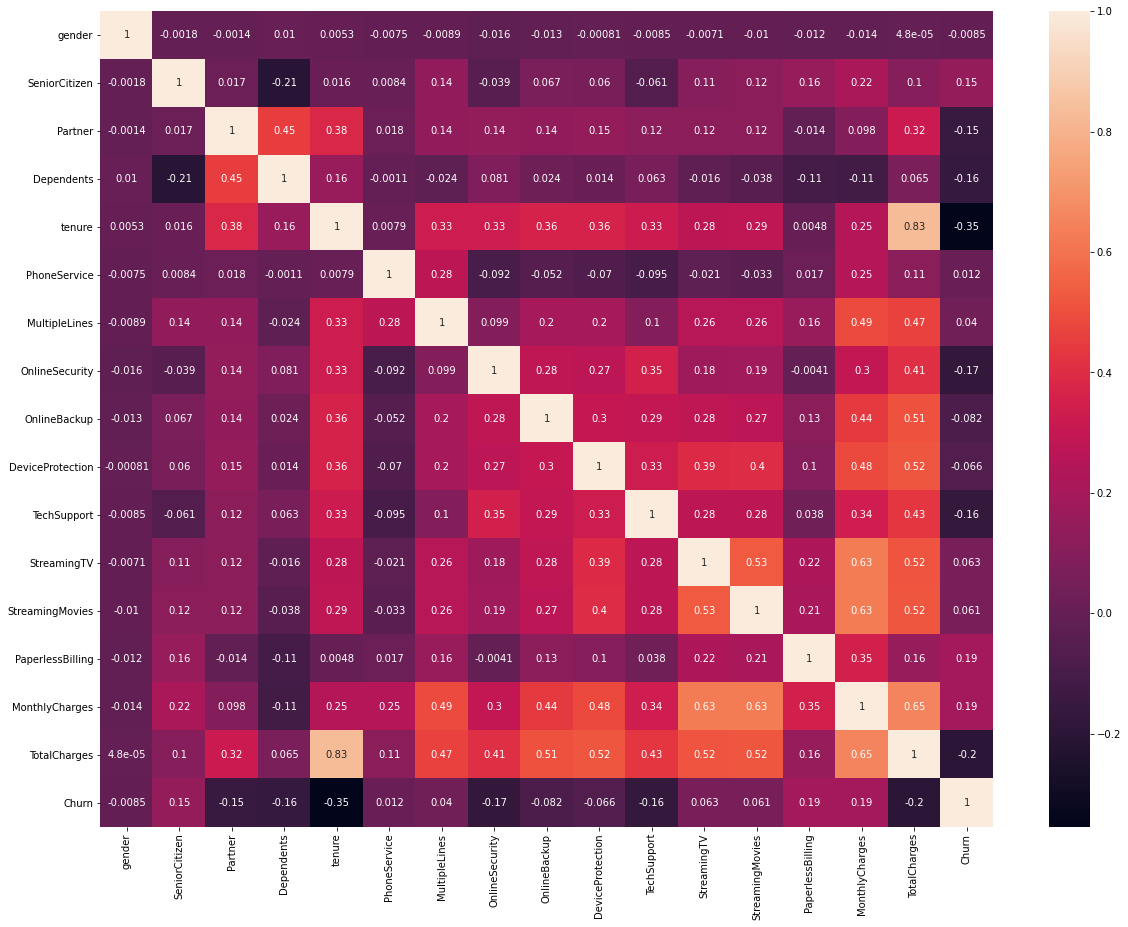

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),annot=True)

In [24]:
df2.corr().Churn.sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
PhoneService        0.011691
gender             -0.008545
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tenure             -0.354049
Name: Churn, dtype: float64

In [25]:
df3=df2[["tenure","MonthlyCharges","TotalCharges","Churn"]].copy()

In [26]:
df3["charge_vs_tenure"]=df3.TotalCharges/df3.tenure

In [27]:
df3.sample(20)

,tenure,MonthlyCharges,TotalCharges,Churn,charge_vs_tenure
6392,60,49.75,3069.45,0,51.157500
3589,31,59.70,1825.50,0,58.887097
1712,29,55.25,1620.20,0,55.868966
1796,23,73.65,1642.75,0,71.423913
1579,12,80.45,950.20,1,79.183333
2959,27,100.75,2793.55,0,103.464815
158,16,64.25,1024.00,0,64.000000
2411,60,84.95,4984.85,0,83.080833
7019,39,20.15,826.00,0,21.179487
4236,1,19.95,19.95,0,19.950000


In [28]:
df3[abs(df3.charge_vs_tenure-df3.MonthlyCharges)>10].shape

(51, 5)

In [29]:
(df3.charge_vs_tenure-df3.MonthlyCharges).describe()

count    7032.000000
mean        0.001215
std         2.616165
min       -19.125000
25%        -1.147775
50%         0.000000
75%         1.160179
max        18.900000
dtype: float64

<AxesSubplot:>

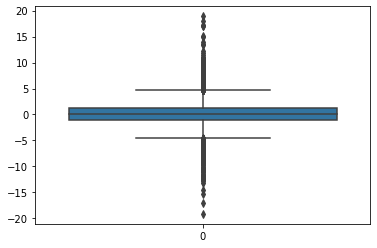

In [30]:
sns.boxplot(data=(df3.charge_vs_tenure-df3.MonthlyCharges))

In [31]:
for col in df2.dtypes[df2.dtypes=="object"].index:
    print(f'{col} : {df2[col].unique()} \n')

InternetService : ['DSL' 'Fiber optic' 0] 

Contract : ['Month-to-month' 'One year' 'Two year'] 

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [32]:
processed_df=pd.get_dummies(df2,drop_first=True)
processed_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2301,0,0,1,0,8,1,1,0,0,0,...,90.25,743.75,0,0,1,0,0,0,1,0
985,0,1,1,0,33,1,1,0,1,0,...,80.60,2656.50,1,0,1,0,0,0,0,0
5736,1,0,0,0,1,1,0,0,0,0,...,20.05,20.05,0,0,0,0,0,0,0,1
3965,0,1,1,0,52,1,1,0,1,1,...,106.50,5621.85,0,0,1,1,0,0,1,0
6782,0,0,0,0,11,1,0,0,1,0,...,51.10,531.15,0,1,0,0,0,0,1,0


In [33]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]

scaler=MinMaxScaler()
processed_df[cols_to_scale]=scaler.fit_transform(processed_df[cols_to_scale])
processed_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2995,0,0,0,0,0.000000,0,0,0,0,0,...,0.069652,0.000744,0,1,0,0,0,0,0,0
3137,0,0,1,1,0.563380,1,1,0,1,1,...,0.903980,0.511822,0,0,1,1,0,0,0,0
1231,1,0,0,0,0.267606,1,0,1,0,1,...,0.459204,0.159220,0,1,0,0,0,1,0,0
2584,0,0,1,0,0.802817,1,0,1,1,0,...,0.467662,0.435357,0,1,0,0,0,1,0,0
1452,1,1,0,0,0.718310,0,0,1,0,0,...,0.303980,0.292667,0,1,0,0,0,1,0,0


In [34]:
X=processed_df.drop("Churn",axis=1)
y=processed_df.Churn

## Training Imbalanced Dataset

In [35]:
def ANN(X,y,epoch=50,test_size=.2):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
    
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    model.fit(X_train,y_train,epochs=epoch)
    
    print(classification_report(y_test,np.round(model.predict(X_test))))   

In [36]:
ANN(X,y,epoch=50,test_size=.2)

Epoch 1/50
176/176 [==============================] - 2s 4ms/step - loss: 0.4934 - accuracy: 0.7655
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7954
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8018
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4235 - accuracy: 0.8041
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8048
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8069
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8078
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4170 - accuracy: 0.8092
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8084
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8100

# BALANCING DATASETS

## Under sampling

In [38]:
dist_count=processed_df.Churn.value_counts()
dist_count

0    5163
1    1869
Name: Churn, dtype: int64

In [39]:
churn_0_df_under=processed_df[processed_df.Churn==0].sample(dist_count[1])
churn_1_df_under=processed_df[processed_df.Churn==1]
df_under=pd.concat([churn_0_df_under,churn_1_df_under],axis=0)

In [40]:
df_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [41]:
ANN(df_under.drop("Churn",axis=1),df_under.Churn,epoch=50,test_size=.2)

Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.6683 - accuracy: 0.5371
Epoch 2/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5960 - accuracy: 0.7211
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7415
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7545
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7615
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7629
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7645
Epoch 8/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7656
Epoch 9/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7615
Epoch 10/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7692
Epoch 11/50
94/94 [

## Over Sampling

In [42]:
churn_1_df_over=processed_df[processed_df.Churn==1].sample(dist_count[0],replace=True)
churn_0_df_over=processed_df[processed_df.Churn==0]
df_over=pd.concat([churn_0_df_over,churn_1_df_over],axis=0)
df_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [43]:
ANN(df_over.drop("Churn",axis=1),df_over.Churn)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5831 - accuracy: 0.7027
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.7531
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7576
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7588
Epoch 5/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7622
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4860 - accuracy: 0.7620
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4830 - accuracy: 0.7634
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.7650
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4787 - accuracy: 0.7694
Epoch 10/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7688

## 3. SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [50]:
dist_count

0    5163
1    1869
Name: Churn, dtype: int64

In [56]:
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(processed_df.drop("Churn",axis=1),processed_df["Churn"])
X_sm.shape

(10326, 23)

In [57]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [58]:
ANN(X_sm,y_sm)

Epoch 1/50
259/259 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7268
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7775
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.7792
Epoch 4/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.7818
Epoch 5/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4554 - accuracy: 0.7829
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.7852
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.7864
Epoch 8/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.7883
Epoch 9/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.7901
Epoch 10/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.7930

## Ensemble

In [45]:
from math import ceil

X_train,X_test,y_train,y_test=train_test_split(processed_df.drop("Churn",axis=1),processed_df.Churn,test_size=0.2,random_state=5,stratify=processed_df.Churn)

to_batch_df=pd.concat([X_train,y_train],axis=1)
counts=to_batch_df.Churn.value_counts()

no_batchs=ceil(counts[0]/counts[1])
df_1=to_batch_df[to_batch_df.Churn==1]
df_0=to_batch_df[to_batch_df.Churn==0]

prediction=[]
clf_report=[]
for i in range(no_batchs):
    batch=pd.concat([df_1,df_0.sample(counts[1])],axis=0)
    train_X=batch.drop("Churn",axis=1)
    train_y=batch.Churn
    
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(train_X.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    model.fit(train_X,train_y,epochs=50)
    
    prediction.append(model.predict(X_test))
    clf_report.append(classification_report(y_test,np.round(model.predict(X_test))))

Epoch 1/50
94/94 [==============================] - 2s 2ms/step - loss: 0.6862 - accuracy: 0.5826
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7318
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7535
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7599
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7639
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7679
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7676
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7669
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7689
Epoch 10/50
94/94 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7689
Epoch 11/50
94/94 [

94/94 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7839
Epoch 33/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7870
Epoch 34/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7829
Epoch 35/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7860
Epoch 36/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7883
Epoch 37/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.7900
Epoch 38/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7893
Epoch 39/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.7886
Epoch 40/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7863
Epoch 41/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7903
Epoch 42/50
94/94 [===

In [46]:
for i in range(no_batchs):
    print(f"batch {i}")
    print(clf_report[i])

batch 0
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407

batch 1
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.75      0.76      1407

batch 2
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1

In [47]:
majority_vote=np.round(prediction[0])+np.round(prediction[1])+np.round(prediction[2])
majority_vote[majority_vote<2]=0 
majority_vote[majority_vote>1]=1
majority_vote.shape

(1407, 1)

In [48]:
print(classification_report(y_test,majority_vote))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



### (H.W) Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [59]:
def LOG(X,y,epoch=50,test_size=.2):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
 
    model=LogisticRegression()
    model.fit(X_train,y_train)
    
    print(classification_report(y_test,model.predict(X_test)))   

### UNDER SAMPLING

In [60]:
LOG(df_under.drop("Churn",axis=1),df_under.Churn,epoch=50,test_size=.2)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       374
           1       0.76      0.81      0.78       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



### OVER SAMPLING

In [61]:
LOG(df_over.drop("Churn",axis=1),df_over.Churn)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1033
           1       0.76      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



### SMOTE

In [62]:
LOG(X_sm,y_sm)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



### ENSEMBLE

In [63]:
X_train,X_test,y_train,y_test=train_test_split(processed_df.drop("Churn",axis=1),processed_df.Churn,test_size=0.2,random_state=5,stratify=processed_df.Churn)

to_batch_df=pd.concat([X_train,y_train],axis=1)
counts=to_batch_df.Churn.value_counts()

no_batchs=ceil(counts[0]/counts[1])
df_1=to_batch_df[to_batch_df.Churn==1]
df_0=to_batch_df[to_batch_df.Churn==0]

prediction=[]
clf_report=[]
for i in range(no_batchs):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
 
    model=LogisticRegression()
    model.fit(X_train,y_train)
    prediction.append(model.predict(X_test))
    print("batch",i)
    print(classification_report(y_test,model.predict(X_test))) 
    
major_vote_log=prediction[0]+prediction[1]+prediction[2]
major_vote_log[major_vote_log<2]=0 
major_vote_log[major_vote_log>1]=1
print("FINAL")
print(classification_report(y_test,major_vote_log)) 

batch 0
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

batch 1
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

batch 2
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1